# The Lending Club Dataset


# Predicting Term

## Importing Libraries

In [1]:
%matplotlib inline
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
from scipy.stats import kendalltau
import seaborn as sns
import matplotlib

## Reading in data



In [2]:
data = pd.read_csv('./loan.csv', low_memory=False)

In [3]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dropping id variables

In [4]:
data['emp_title'].head(10)

0                          NaN
1                        Ryder
2                          NaN
3          AIR RESOURCES BOARD
4     University Medical Group
5         Veolia Transportaton
6    Southern Star Photography
7              MKC Accounting 
8                          NaN
9                    Starbucks
Name: emp_title, dtype: object

In [4]:
data['member_id'].head(10)

0    1296599
1    1314167
2    1313524
3    1277178
4    1311748
5    1311441
6    1304742
7    1288686
8    1306957
9    1306721
Name: member_id, dtype: int64

In [5]:
data['loan_status'].head(10)

0     Fully Paid
1    Charged Off
2     Fully Paid
3     Fully Paid
4        Current
5     Fully Paid
6        Current
7     Fully Paid
8    Charged Off
9    Charged Off
Name: loan_status, dtype: object

In [6]:
data['pymnt_plan'].head(10)

0    n
1    n
2    n
3    n
4    n
5    n
6    n
7    n
8    n
9    n
Name: pymnt_plan, dtype: object

In [7]:
data['url'].head(10)

0    https://www.lendingclub.com/browse/loanDetail....
1    https://www.lendingclub.com/browse/loanDetail....
2    https://www.lendingclub.com/browse/loanDetail....
3    https://www.lendingclub.com/browse/loanDetail....
4    https://www.lendingclub.com/browse/loanDetail....
5    https://www.lendingclub.com/browse/loanDetail....
6    https://www.lendingclub.com/browse/loanDetail....
7    https://www.lendingclub.com/browse/loanDetail....
8    https://www.lendingclub.com/browse/loanDetail....
9    https://www.lendingclub.com/browse/loanDetail....
Name: url, dtype: object

In [8]:
data['desc'].head(10)

0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                                                  NaN
3      Borrower added on 12/21/11 > to pay for prop...
4      Borrower added on 12/21/11 > I plan on combi...
5                                                  NaN
6      Borrower added on 12/18/11 > I am planning o...
7      Borrower added on 12/16/11 > Downpayment for...
8      Borrower added on 12/21/11 > I own a small h...
9      Borrower added on 12/16/11 > I'm trying to b...
Name: desc, dtype: object

In [10]:
data['title'].head(10)

0                                 Computer
1                                     bike
2                     real estate business
3                                 personel
4                                 Personal
5    My wedding loan I promise to pay back
6                                     Loan
7                          Car Downpayment
8     Expand Business & Buy Debt Portfolio
9              Building my credit history.
Name: title, dtype: object

In [5]:
data.drop(['id', 'member_id', 'emp_title'], axis=1, inplace=True)
data.drop(['loan_status'], 1, inplace=True)
data.drop(['pymnt_plan','url','desc','title' ], 1, inplace=True)

## Fixing *emp_length*

In [6]:
data['emp_length'].head(10)

0    10+ years
1     < 1 year
2    10+ years
3    10+ years
4       1 year
5      3 years
6      8 years
7      9 years
8      4 years
9     < 1 year
Name: emp_length, dtype: object

In [7]:
data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', 'n/a'], dtype=object)

In [8]:
sum(data['emp_length']=='n/a')

44825

Fill in missing values:

In [9]:
data.replace('n/a', np.nan, inplace=True)
data.emp_length.fillna(value=0, inplace=True)

#we use nan rather na as nan is more faster to execute than na
#data.emp_length.fillna(value=np.nan,inplace=True)

Convert to numbers:

In [10]:
# we used regex func to replace any value which is not a no b/w 0 to 9 and given an empty value
data['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)


data['emp_length'] = data['emp_length'].astype(int)

In [11]:
data['emp_length'].head(10)

0    10
1     1
2    10
3    10
4     1
5     3
6     8
7     9
8     4
9     1
Name: emp_length, dtype: int64

## Fixing *term*

In [12]:
data['term'].head(10)

0     36 months
1     60 months
2     36 months
3     36 months
4     60 months
5     36 months
6     60 months
7     36 months
8     60 months
9     60 months
Name: term, dtype: object

In [13]:
data['term'] = data['term'].apply(lambda x: x.lstrip())

In [14]:
data['term'].head(10)

0    36 months
1    60 months
2    36 months
3    36 months
4    60 months
5    36 months
6    60 months
7    36 months
8    60 months
9    60 months
Name: term, dtype: object

In [11]:
data['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [12]:
data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [13]:
data['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [14]:
pd.get_dummies(data[['purpose','term' ,'grade']])

,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,...,purpose_wedding,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0


In [16]:
# cat_variables = ['term', 'purpose', 'grade']
cols = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'grade', 'purpose', 'term']

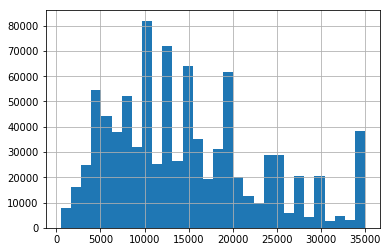

In [17]:
data[cols[0]].hist(bins=30)

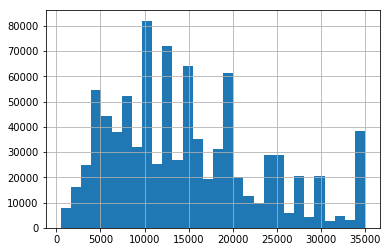

In [18]:
data[cols[1]].hist(bins=30)

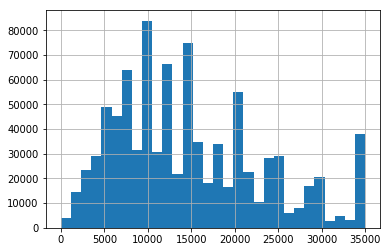

In [19]:
data[cols[2]].hist(bins=30)

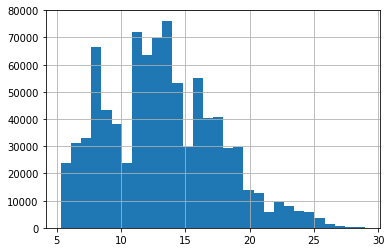

In [20]:
data[cols[3]].hist(bins=30)

## (Statitical) Summary

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 66 columns):
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_length                     887379 non-null int64
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
purpose                        887379 non-null object
zip_code                       887379 non-null object
addr_state                     887379 non-null object
dti                 

In [16]:
data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,14755.264605,14741.877625,14702.464383,13.246740,436.717127,5.784738,7.502759e+04,18.157039,0.314442,0.694623,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,8435.455601,8429.897657,8442.106732,4.381867,244.186593,3.695776,6.469830e+04,17.190626,0.862244,0.998448,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,8000.000000,8000.000000,8000.000000,9.990000,260.705000,2.000000,4.500000e+04,11.910000,0.000000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.000000,6.500000e+04,17.650000,0.000000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,20000.000000,20000.000000,20000.000000,16.200000,572.600000,10.000000,9.000000e+04,23.950000,0.000000,1.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,10.000000,9.500000e+06,9999.000000,39.000000,33.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


In [17]:
np.transpose(data.describe())

#same func by data.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,887379.0,14755.264605,8435.455601,500.00,8000.000,13000.000000,20000.000000,3.500000e+04
funded_amnt,887379.0,14741.877625,8429.897657,500.00,8000.000,13000.000000,20000.000000,3.500000e+04
funded_amnt_inv,887379.0,14702.464383,8442.106732,0.00,8000.000,13000.000000,20000.000000,3.500000e+04
int_rate,887379.0,13.246740,4.381867,5.32,9.990,12.990000,16.200000,2.899000e+01
installment,887379.0,436.717127,244.186593,15.67,260.705,382.550000,572.600000,1.445460e+03
emp_length,887379.0,5.784738,3.695776,0.00,2.000,6.000000,10.000000,1.000000e+01
annual_inc,887375.0,75027.587761,64698.300142,0.00,45000.000,65000.000000,90000.000000,9.500000e+06
dti,887379.0,18.157039,17.190626,0.00,11.910,17.650000,23.950000,9.999000e+03
delinq_2yrs,887350.0,0.314442,0.862244,0.00,0.000,0.000000,0.000000,3.900000e+01
inq_last_6mths,887350.0,0.694623,0.998448,0.00,0.000,0.000000,1.000000,3.300000e+01


## Exploring distribution of features

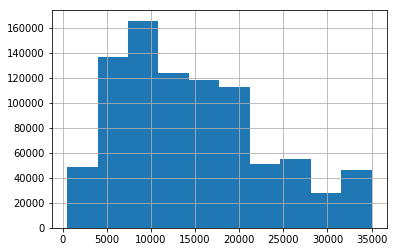

In [18]:
# data['funded_amnt'].value_counts()
data['funded_amnt'].hist(bins=10)

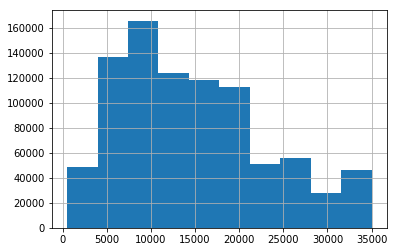

In [19]:
data['loan_amnt'].hist(bins=10)

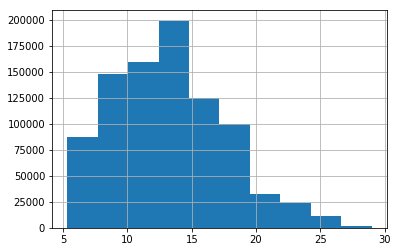

In [20]:
data['int_rate'].hist(bins=10)

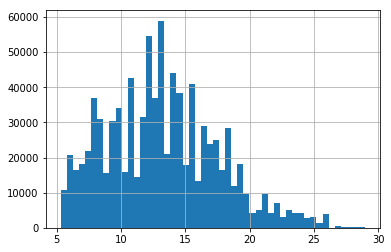

In [21]:
data['int_rate'].hist(bins=50)
# seems like most are concentrated between 10% - 15% interested rates

## Going deeper into a variables: *int_rate*

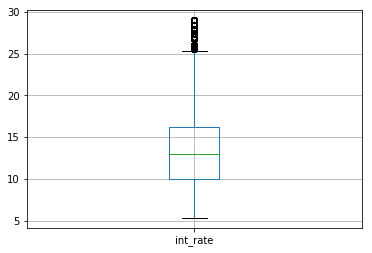

In [22]:
data.boxplot(column='int_rate')

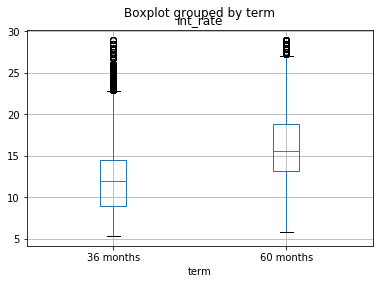

In [23]:
data.boxplot(column='int_rate', by = 'term')
# faceted by term

## Going deeper into a variables: *loan_amnt*

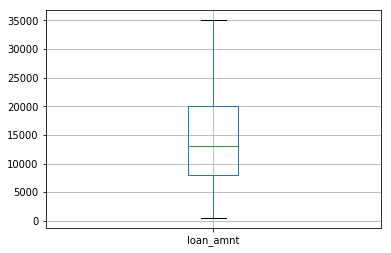

In [24]:
data.boxplot(column='loan_amnt')

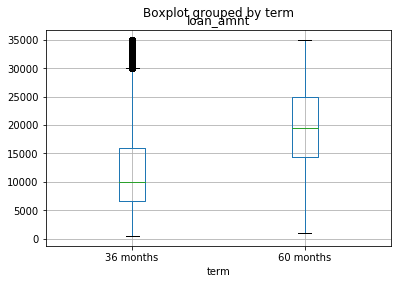

In [25]:
data.boxplot(column='loan_amnt', by='term')

## Fixing the Dates

In [26]:
data.issue_d

0         Dec-2011
1         Dec-2011
2         Dec-2011
3         Dec-2011
4         Dec-2011
5         Dec-2011
6         Dec-2011
7         Dec-2011
8         Dec-2011
9         Dec-2011
10        Dec-2011
11        Dec-2011
12        Dec-2011
13        Dec-2011
14        Dec-2011
15        Dec-2011
16        Dec-2011
17        Dec-2011
18        Dec-2011
19        Dec-2011
20        Dec-2011
21        Dec-2011
22        Dec-2011
23        Dec-2011
24        Dec-2011
25        Dec-2011
26        Dec-2011
27        Dec-2011
28        Dec-2011
29        Dec-2011
            ...   
887349    Jan-2015
887350    Jan-2015
887351    Jan-2015
887352    Jan-2015
887353    Jan-2015
887354    Jan-2015
887355    Jan-2015
887356    Jan-2015
887357    Jan-2015
887358    Jan-2015
887359    Jan-2015
887360    Jan-2015
887361    Jan-2015
887362    Jan-2015
887363    Jan-2015
887364    Jan-2015
887365    Jan-2015
887366    Jan-2015
887367    Jan-2015
887368    Jan-2015
887369    Jan-2015
887370    Ja

In [27]:
import datetime
import datetime as dt

data.issue_d.fillna(value=np.nan, inplace=True)
issue_d_todate = pd.to_datetime(data.issue_d)

#data.issue_d = pd.Series(data.issue_d).str.replace('-2015', '')

#data.issue_d

In [28]:
data.earliest_cr_line.head()

0    Jan-1985
1    Apr-1999
2    Nov-2001
3    Feb-1996
4    Jan-1996
Name: earliest_cr_line, dtype: object

In [29]:
data.earliest_cr_line = pd.to_datetime(data.earliest_cr_line)
data['earliest_cr_line_year'] = data['earliest_cr_line'].dt.year

In [30]:
from pprint import pprint

pprint(data.earliest_cr_line.head())
pprint(data.earliest_cr_line_year.head())

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
Name: earliest_cr_line, dtype: datetime64[ns]
0    1985.0
1    1999.0
2    2001.0
3    1996.0
4    1996.0
Name: earliest_cr_line_year, dtype: float64


## Exploratory Visualizations

In [31]:
pd.value_counts(data['emp_length'])

10    291569
1     127700
2      78870
3      70026
5      55704
4      52529
0      44825
7      44594
8      43955
6      42950
9      34657
Name: emp_length, dtype: int64

In [32]:
pd.value_counts(data['emp_length']).to_frame()

,emp_length
10,291569
1,127700
2,78870
3,70026
5,55704
4,52529
0,44825
7,44594
8,43955
6,42950


In [33]:
pd.value_counts(data['emp_length']).to_frame().reset_index()

,index,emp_length
0,10,291569
1,1,127700
2,2,78870
3,3,70026
4,5,55704
5,4,52529
6,0,44825
7,7,44594
8,8,43955
9,6,42950


In [34]:
import seaborn as sns
import matplotlib

s = pd.value_counts(data['emp_length']).to_frame().reset_index()
s.columns = ['type', 'count']
s

,type,count
0,10,291569
1,1,127700
2,2,78870
3,3,70026
4,5,55704
5,4,52529
6,0,44825
7,7,44594
8,8,43955
9,6,42950


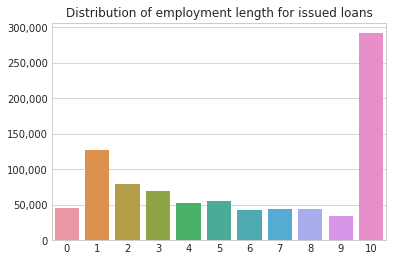

In [35]:
def emp_dur_graph(graph_title):
    sns.set_style("whitegrid")
    ax = sns.barplot(y = "count", x = 'type', data=s)
    ax.set(xlabel = '', ylabel = '', title = graph_title)
    ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    
emp_dur_graph('Distribution of employment length for issued loans')

### Using Seaborn Stylesheets

In [36]:
print (plt.style.available)

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'_classic_test', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn', u'seaborn-poster', u'seaborn-bright', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


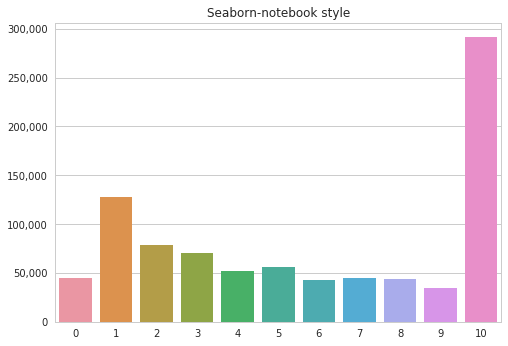

In [37]:
plt.style.use('seaborn-notebook')
ax = emp_dur_graph('Seaborn-notebook style')

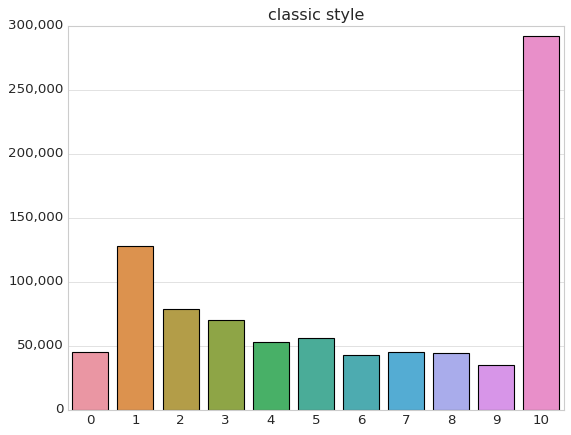

In [38]:
plt.style.use('classic')
ax = emp_dur_graph('classic style')

## Facet Plots

In [39]:
s = pd.value_counts(data['earliest_cr_line']).to_frame().reset_index()
s.columns = ['date', 'count']
s.head()

,date,count
0,2001-08-01,6659
1,2000-08-01,6529
2,2000-10-01,6322
3,2001-10-01,6154
4,2002-08-01,6086


In [40]:
s['year'] = s['date'].dt.year
s['month'] = s['date'].dt.month
d = s[s['year'] > 2008]
pprint(s.head())
pprint(d.head())

        date  count  year  month
0 2001-08-01   6659  2001      8
1 2000-08-01   6529  2000      8
2 2000-10-01   6322  2000     10
3 2001-10-01   6154  2001     10
4 2002-08-01   6086  2002      8
          date  count  year  month
242 2009-08-01   1246  2009      8
261 2009-09-01   1037  2009      9
268 2010-08-01    973  2010      8
271 2009-10-01    965  2009     10
274 2010-09-01    947  2010      9


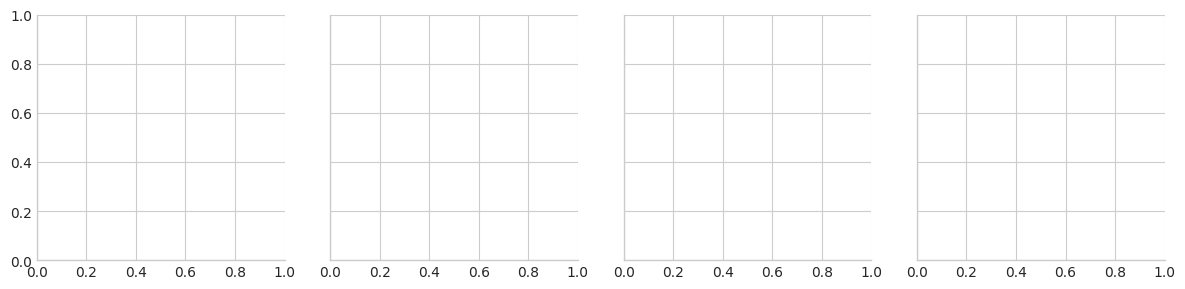

In [41]:
# https://stackoverflow.com/questions/26413185/how-to-recover-matplotlib-defaults-after-setting-stylesheet
plt.rcParams.update(plt.rcParamsDefault)
sns.set_style("whitegrid")

g = sns.FacetGrid(d, col="year")
g

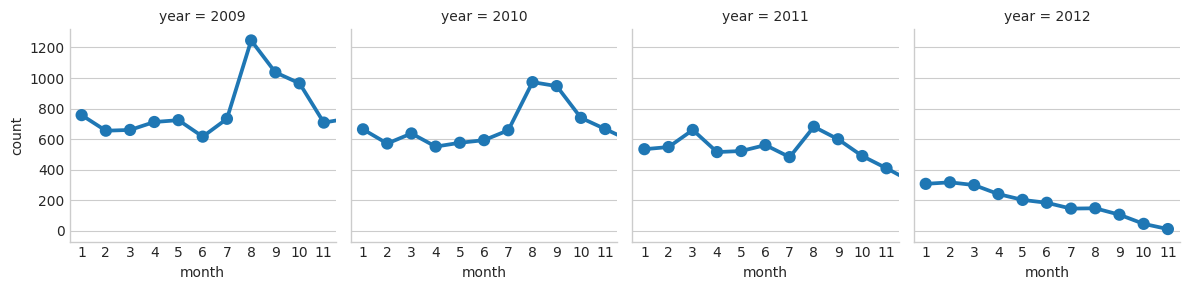

In [42]:
g = sns.FacetGrid(d, col="year")
g = g.map(sns.pointplot, "month", "count")
g

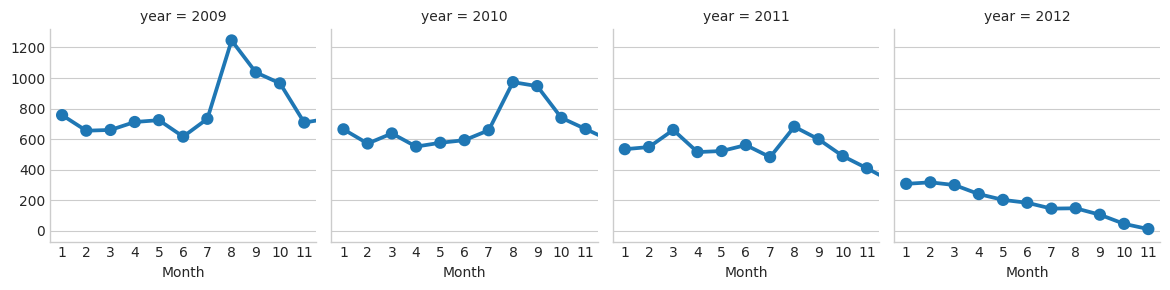

In [43]:
g = sns.FacetGrid(d, col="year")
g = g.map(sns.pointplot, "month", "count")
g.set(xlabel = 'Month', ylabel = '')
g

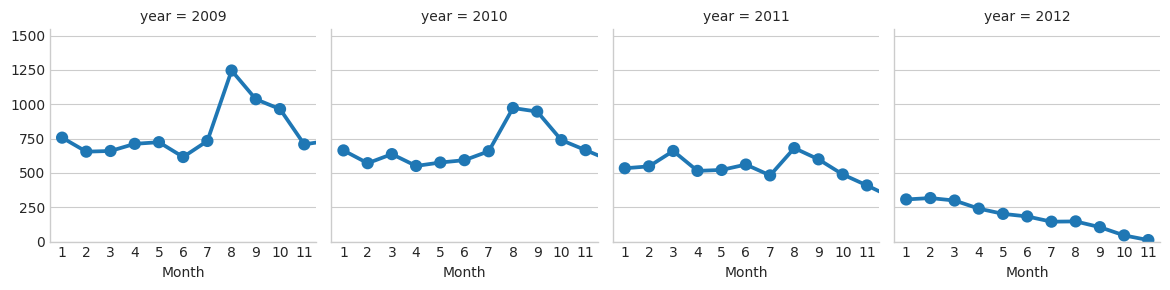

In [44]:
g = sns.FacetGrid(d, col="year")
g = g.map(sns.pointplot, "month", "count")
g.set(xlabel = 'Month', ylabel = '')
axes = plt.gca()
_ = axes.set_ylim([0, d['count'].max()+300])
g

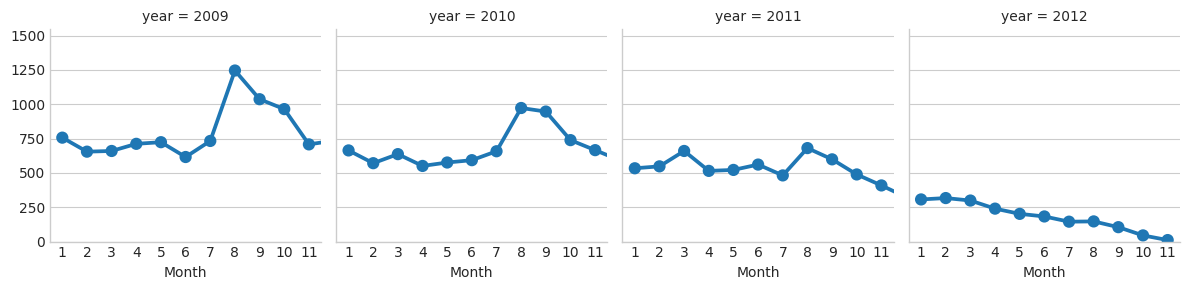

In [45]:
g = sns.FacetGrid(d, col="year")
g = g.map(sns.pointplot, "month", "count")
g.set(xlabel = 'Month', ylabel = '')
axes = plt.gca()
_ = axes.set_ylim([0, d['count'].max()+300])
plt.tight_layout()
g

## Summary Graphs

In [46]:
group = data.groupby('grade').agg([np.mean])
group

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,earliest_cr_line_year
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
grade,,,,,,,,,,,,,,,,,,,,,
A,14038.860306,14023.323572,14000.506187,7.243312,427.599175,5.786170,86942.651653,15.577401,0.185855,0.403371,...,64.551250,1.027260,2.334143,7072.432659,49.404966,47014.290774,0.633198,1.551417,0.967341,1996.123010
B,13642.965211,13630.195062,13594.642917,10.829618,408.439291,5.783869,75487.389207,17.305115,0.308154,0.550598,...,69.538181,1.243783,2.756522,5936.938825,59.140656,32701.382733,0.778795,1.434935,1.592067,1997.296839
C,14466.306028,14458.230599,14423.251934,13.980098,421.942081,5.781868,71536.950300,18.792559,0.349268,0.742774,...,73.358110,1.474073,3.120244,5664.896613,64.175068,28450.268219,1.029860,1.541821,2.204848,1998.145139
D,15459.506278,15450.499670,15405.780441,17.175814,455.570227,5.742307,69169.272616,19.908175,0.361815,0.905060,...,76.007393,1.655491,3.411563,5300.444749,66.918064,26206.514839,1.189189,1.650359,2.741020,1998.548319
E,17998.146171,17970.831978,17907.977084,19.897322,514.993641,5.832134,72119.152229,20.338847,0.365156,1.005148,...,77.119462,1.808172,3.713989,5188.916205,67.777839,26849.450016,1.380886,1.701524,3.144737,1998.711459
F,19139.160809,19098.808904,19005.420917,23.582787,565.654337,5.908097,73801.170917,19.834316,0.370607,1.221861,...,79.773804,2.093458,4.056075,4926.726636,70.020561,25489.949626,1.595794,1.630841,3.696262,1999.006075
G,20538.563491,20497.959555,20296.247792,25.626706,627.054815,5.865185,79904.591762,19.182093,0.424303,1.516305,...,86.357831,2.272727,4.181818,3825.352273,70.452273,25553.756678,1.761364,1.284091,4.204545,1998.983057


In [47]:
loan_amt_mean = group['loan_amnt'].reset_index()
loan_amt_mean

,grade,mean
0,A,14038.860306
1,B,13642.965211
2,C,14466.306028
3,D,15459.506278
4,E,17998.146171
5,F,19139.160809
6,G,20538.563491


In [48]:
import seaborn as sns
import matplotlib

plt.style.use('fivethirtyeight')
sns.set_style("whitegrid")

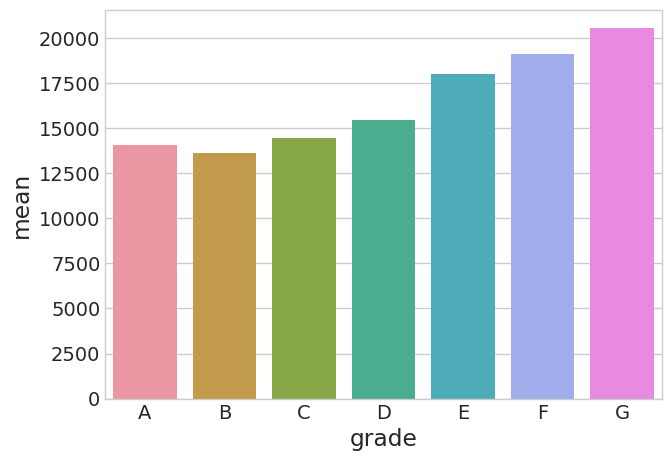

In [49]:
ax = sns.barplot(y = "mean", x = 'grade', data=loan_amt_mean)

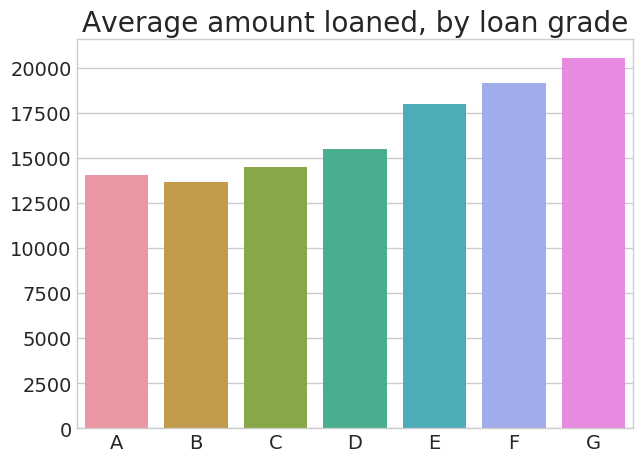

In [50]:
ax = sns.barplot(y = "mean", x = 'grade', data=loan_amt_mean)
ax.set(xlabel = '', ylabel = '', title = 'Average amount loaned, by loan grade')

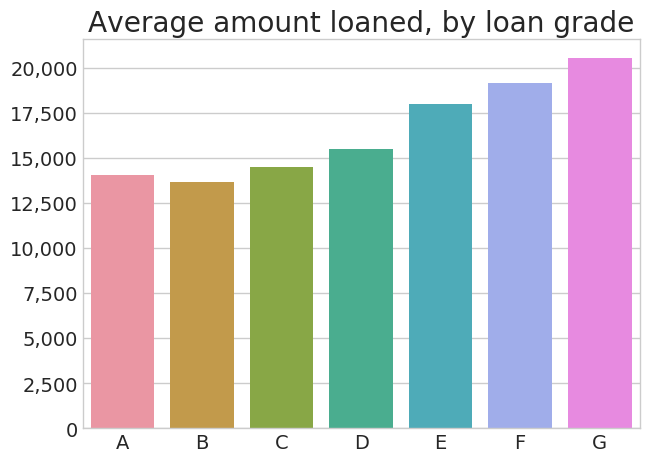

In [51]:
ax = sns.barplot(y = "mean", x = 'grade', data=loan_amt_mean)
ax.set(xlabel = '', ylabel = '', title = 'Average amount loaned, by loan grade')
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

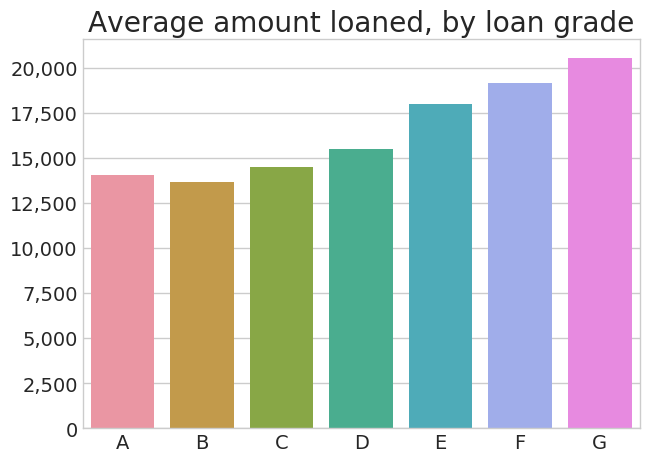

In [52]:
ax = sns.barplot(y = "mean", x = 'grade', data=loan_amt_mean)
ax.set(xlabel = '', ylabel = '', title = 'Average amount loaned, by loan grade')
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

## Summary Graphs with Faceting

In [53]:
filtered  = data[data['earliest_cr_line_year'] > 2008]
group = filtered.groupby(['grade', 'earliest_cr_line_year']).agg([np.mean])
group

loan_amnt   funded_amnt funded_amnt_inv  \
                                     mean          mean            mean   
grade earliest_cr_line_year                                               
A     2009.0                 10719.520997  10719.520997    10717.552493   
      2010.0                 10833.776091  10833.776091    10832.115750   
      2011.0                 10743.474576  10743.474576    10741.949153   
      2012.0                 10061.153846  10061.153846    10056.923077   
B     2009.0                  9933.807465   9933.807465     9930.143377   
      2010.0                  9677.770006   9677.770006     9673.992725   
      2011.0                  9094.598888   9094.598888     9092.911041   
      2012.0                  8876.614987   8876.614987     8874.677003   
C     2009.0                  9842.134205   9842.134205     9838.643609   
      2010.0                  9582.726784   9582.726784     9579.992829   
      2011.0                  9129.803265   9129.803265     9127.040603   
      2012.0                  9043.669666   9043.669666     9040.874036   
D     2009.0                 10416.779110  10416.779110    10408.620690   
      2010.0                 10049.858116  10049.858116    10042.040295   
      2011.0                 10112.763636  10112.763636    10103.400000   
      2012.0                  9329.885057   9329.885057     9314.885057   
E     2009.0                 12600.936884  12600.936884    12591.074951   
      2010.0                 11705.980066  11705.980066    11697.120709   
      2011.0                 11365.588663  11365.588663    11355.704942   
      2012.0                 10798.367347  10798.367347    10781.428571   
F     2009.0                 12957.988981  12957.988981    12945.936639   
      2010.0                 12237.155963  12237.155963    12227.828746   
      2011.0                 12107.446809  12107.446809    12090.851064   
      2012.0                 13138.928571  13138.928571    13115.000000   
G     2009.0                 15276.013514  15276.013514    15268.243243   
      2010.0                 13372.916667  13372.916667    13364.930556   
      2011.0                 14953.614458  14953.614458    14949.096386   
      2012.0                 12292.857143  12292.857143    12257.142857   

                              int_rate installment emp_length    annual_inc  \
                                  mean        mean       mean          mean   
grade earliest_cr_line_year                                                   
A     2009.0                  7.292717  331.369003   3.400262  63755.376549   
      2010.0                  7.336546  333.216717   3.512334  66856.007154   
      2011.0                  7.230203  331.199492   3.352542  65745.622373   
      2012.0                  7.312000  311.775538   3.430769  69803.907692   
B     2009.0                 10.745112  313.454743   3.395995  55422.011115   
      2010.0                 10.726267  309.228506   3.509793  54366.878942   
      2011.0                 10.548928  290.553471   3.503574  54477.797998   
      2012.0                 10.333282  284.251912   3.416021  54076.961654   
C     2009.0                 13.780045  312.687753   3.473063  49352.753497   
      2010.0                 13.639416  307.023356   3.438150  48019.861624   
      2011.0                 13.399548  296.345350   3.377145  46690.400163   
      2012.0                 13.225643  293.656838   3.150386  47258.305913   
D     2009.0                 17.147316  329.753443   3.507246  46979.163283   
      2010.0                 16.965375  319.255482   3.371737  46499.859784   
      2011.0                 16.754102  322.547891   3.432727  46164.705927   
      2012.0                 16.798207  306.159379   3.124138  43812.261540   
E     2009.0                 19.845316  385.811262   3.470414  50237.774467   
      2010.0                 19.717984  359.245382   3.514950  46837.814718   
      2011.0                 19.484578  352.592

In [54]:
graph_df = group['int_rate'].reset_index()
graph_df

,grade,earliest_cr_line_year,mean
0,A,2009.0,7.292717
1,A,2010.0,7.336546
2,A,2011.0,7.230203
3,A,2012.0,7.312000
4,B,2009.0,10.745112
5,B,2010.0,10.726267
6,B,2011.0,10.548928
7,B,2012.0,10.333282
8,C,2009.0,13.780045
9,C,2010.0,13.639416


In [55]:
import seaborn as sns
import matplotlib

plt.style.use('fivethirtyeight')
plt.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')
sns.set_style("whitegrid")

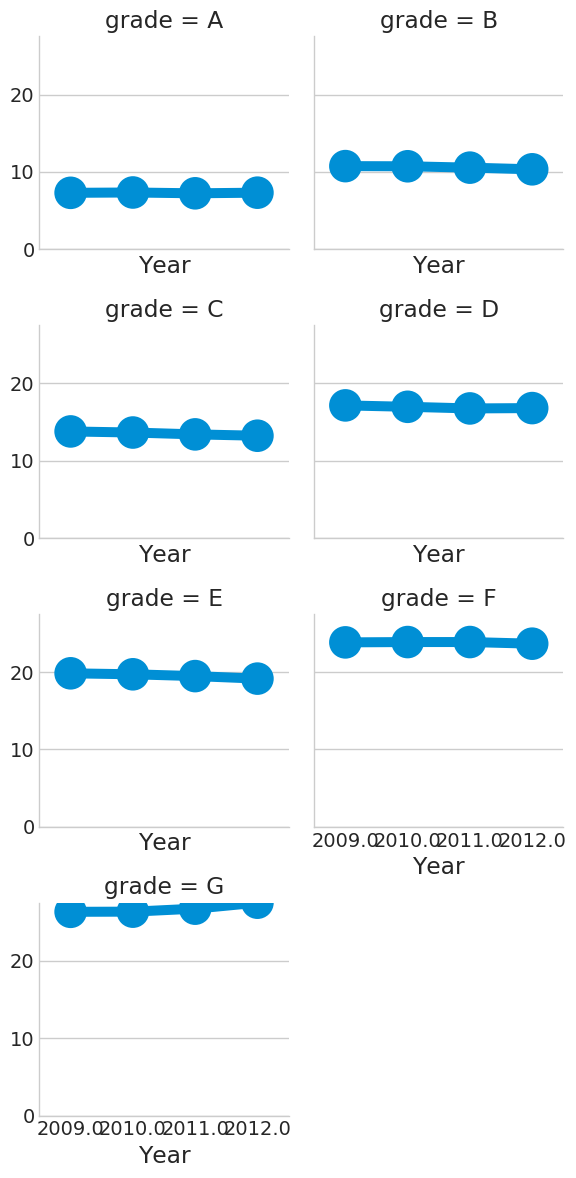

In [56]:
g = sns.FacetGrid(graph_df, col="grade", col_wrap = 2)
g = g.map(sns.pointplot, "earliest_cr_line_year", "mean")
g.set(xlabel = 'Year', ylabel = '')
axes = plt.gca()
axes.set_ylim([0, graph_df['mean'].max()])
_ = plt.tight_layout()

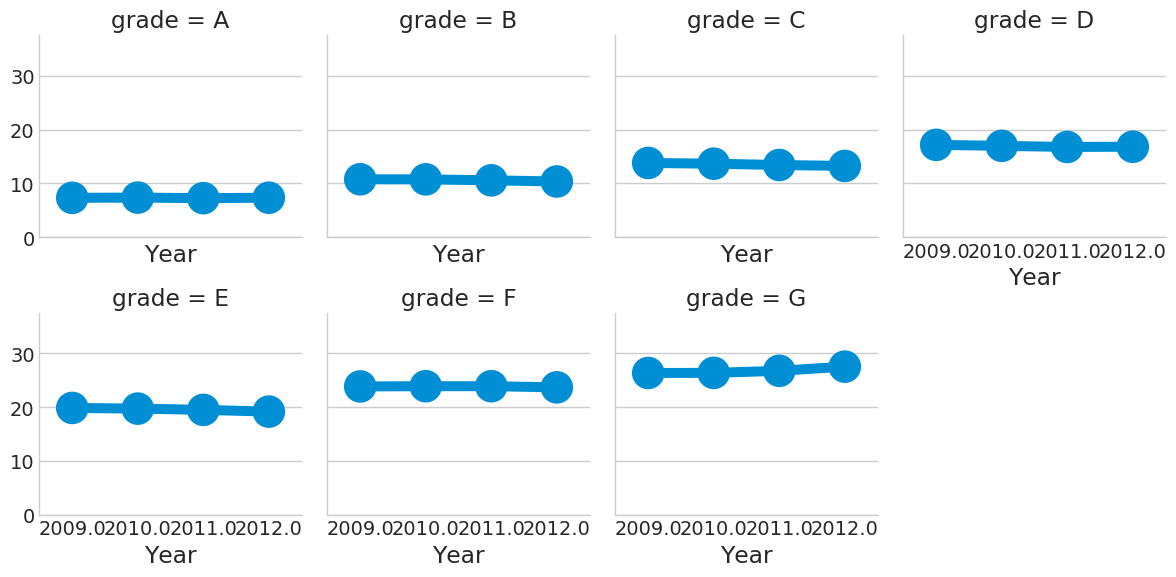

In [57]:
g = sns.FacetGrid(graph_df, col="grade", col_wrap = 4)
g = g.map(sns.pointplot, "earliest_cr_line_year", "mean")
g.set(xlabel = 'Year', ylabel = '')
axes = plt.gca()
axes.set_ylim([0, graph_df['mean'].max()+10])
_ = plt.tight_layout()

## Missing Values

Let's look at the variables with missing values

In [58]:
data.apply(lambda x: sum(x.isnull()), axis=0)

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_length                          0
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
purpose                             0
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         454312
mths_since_last_record         750326
open_acc                           29
pub_rec                            29
revol_bal                           0
revol_util                        502
total_acc   

In [59]:
missing_info = data.apply(lambda x: (100.0*sum(x.isnull()))/x.shape[0], axis=0)
missing_info

loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
term                            0.000000
int_rate                        0.000000
installment                     0.000000
grade                           0.000000
sub_grade                       0.000000
emp_length                      0.000000
home_ownership                  0.000000
annual_inc                      0.000451
verification_status             0.000000
issue_d                         0.000000
purpose                         0.000000
zip_code                        0.000000
addr_state                      0.000000
dti                             0.000000
delinq_2yrs                     0.003268
earliest_cr_line                0.003268
inq_last_6mths                  0.003268
mths_since_last_delinq         51.197065
mths_since_last_record         84.555303
open_acc                        0.003268
pub_rec                         0.003268
revol_bal       

In [60]:
missing_info.value_counts

<bound method Series.value_counts of loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
term                            0.000000
int_rate                        0.000000
installment                     0.000000
grade                           0.000000
sub_grade                       0.000000
emp_length                      0.000000
home_ownership                  0.000000
annual_inc                      0.000451
verification_status             0.000000
issue_d                         0.000000
purpose                         0.000000
zip_code                        0.000000
addr_state                      0.000000
dti                             0.000000
delinq_2yrs                     0.003268
earliest_cr_line                0.003268
inq_last_6mths                  0.003268
mths_since_last_delinq         51.197065
mths_since_last_record         84.555303
open_acc                        0.003268
pub_rec             

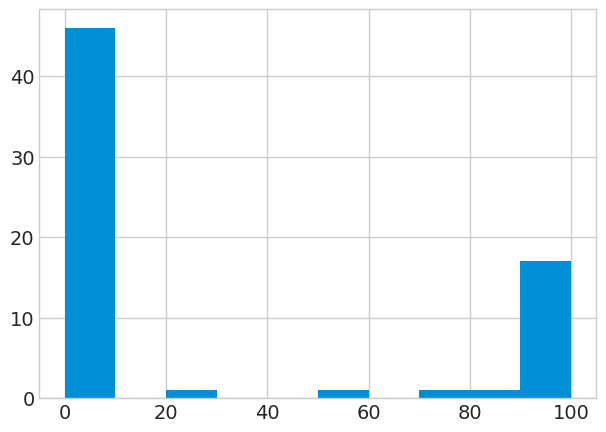

In [61]:
missing_info.hist()

In [62]:
missing_info[missing_info>=90]

annual_inc_joint             99.942415
dti_joint                    99.942640
verification_status_joint    99.942415
open_acc_6m                  97.591559
open_il_6m                   97.591559
open_il_12m                  97.591559
open_il_24m                  97.591559
mths_since_rcnt_il           97.654892
total_bal_il                 97.591559
il_util                      97.902024
open_rv_12m                  97.591559
open_rv_24m                  97.591559
max_bal_bc                   97.591559
all_util                     97.591559
inq_fi                       97.591559
total_cu_tl                  97.591559
inq_last_12m                 97.591559
dtype: float64

* Missing Value imputation is hard, because there really is no correct answer.
* A pure data science/mining approach would test each of the approaches using a CV split and include the most accurate treatment in their modelling pipeline.

We'll inspect:

- Dropping columns
- Mean imputation
- Median imputation
- Algorithmic imputation

Let's drop any column that includes "mths" in it.

In [63]:
mths = [s for s in data.columns.values if "mths" in s]
pprint(mths)

data.drop(mths, axis=1, inplace=True)

['inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'mths_since_rcnt_il']


In [64]:
#data['emp_length'].fillna(data['emp_length'].mean())
data['emp_length'].fillna(data['emp_length'].median())
data['emp_length'].fillna(data['earliest_cr_line_year'].median())

0         10
1          1
2         10
3         10
4          1
5          3
6          8
7          9
8          4
9          1
10         5
11        10
12         1
13         3
14         3
15         1
16         4
17        10
18         1
19         6
20         3
21        10
22        10
23         5
24         1
25         2
26         9
27         2
28        10
29         1
          ..
887349     2
887350    10
887351    10
887352     1
887353     4
887354    10
887355     0
887356    10
887357    10
887358     3
887359     0
887360    10
887361    10
887362     9
887363     4
887364     1
887365    10
887366     2
887367     1
887368     8
887369    10
887370     8
887371     0
887372     1
887373    10
887374     8
887375    10
887376     5
887377     1
887378    10
Name: emp_length, Length: 887379, dtype: int64

In [65]:
from sklearn.ensemble import RandomForestClassifier

rf =  RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1)

data['emp_length'].replace(to_replace=0, value=np.nan, inplace=True, regex=True)
cat_variables = ['term', 'purpose', 'grade']
columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'grade', 'purpose', 'term']


In [66]:
def impute_missing_algo(df, target, cat_vars, cols, algo):
    y = pd.DataFrame(df[target])
    X = df[cols].copy()
    X.drop(cat_vars, axis=1, inplace=True)

    cat_vars = pd.get_dummies(df[cat_vars])

    X = pd.concat([X, cat_vars], axis = 1)

    y['null'] = y[target].isnull()
    y['null'] = y.loc[:, target].isnull()
    X['null'] = y[target].isnull()

    y_missing = y[y['null'] == True]
    y_notmissing = y[y['null'] == False]
    X_missing = X[X['null'] == True]
    X_notmissing = X[X['null'] == False]

    y_missing.loc[:, target] = ''

    dfs = [y_missing, y_notmissing, X_missing, X_notmissing]
    
    for df in dfs:
        df.drop('null', inplace = True, axis = 1)

    y_missing = y_missing.values.ravel(order='C')
    y_notmissing = y_notmissing.values.ravel(order='C')
    X_missing = X_missing.as_matrix()
    X_notmissing = X_notmissing.as_matrix()
    
    algo.fit(X_notmissing, y_notmissing)
    y_missing = algo.predict(X_missing)

    y.loc[(y['null'] == True), target] = y_missing
    y.loc[(y['null'] == False), target] = y_notmissing
    
    return(y[target])

In [67]:
data['emp_length'] = impute_missing_algo(data, 'emp_length', cat_variables, columns, rf)
data['earliest_cr_line_year'] = impute_missing_algo(data, 'earliest_cr_line_year', cat_variables, columns, rf)

/home/kakarot/anaconda2/envs/py27/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/kakarot/anaconda2/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


##  A baseline hypothesis

* Classify the term of the loan.

If necessary, we'll work on a sample of the data

In [68]:
# Returns a random sample of items - 30% so the dataset is easy to work with
orig = data.copy()
data = data.sample(frac = 0.3)
data.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,earliest_cr_line_year
549138,30000.0,30000.0,30000.0,60 months,21.99,828.40,F,F1,1.0,MORTGAGE,...,NaN,NaN,NaN,NaN,NaN,68000.0,NaN,NaN,NaN,1994.0
258214,20400.0,20400.0,20400.0,60 months,12.99,464.06,C,C2,10.0,RENT,...,NaN,NaN,NaN,NaN,NaN,32200.0,NaN,NaN,NaN,1997.0


In [69]:
from sklearn import preprocessing
from sklearn import linear_model

In [70]:
y = data.term

cols = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'grade', 'emp_length', 'purpose', 'earliest_cr_line_year']
X = pd.get_dummies(data[cols])
X

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,emp_length,earliest_cr_line_year,grade_A,grade_B,grade_C,grade_D,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
549138,30000.0,30000.0,30000.000000,21.99,1.0,1994.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
258214,20400.0,20400.0,20400.000000,12.99,10.0,1997.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
495422,8000.0,8000.0,8000.000000,5.32,1.0,2001.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420854,24000.0,24000.0,24000.000000,12.99,7.0,1986.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
674453,10000.0,10000.0,10000.000000,9.99,1.0,2009.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
388634,12000.0,12000.0,12000.000000,7.69,1.0,2003.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
347214,3000.0,3000.0,3000.000000,10.99,10.0,1994.0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
197175,25000.0,25000.0,25000.000000,15.31,10.0,1989.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
166150,20000.0,20000.0,20000.000000,6.03,10.0,1990.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71895,26500.0,26500.0,26500.000000,16.20,10.0,1995.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
y = y.apply(lambda x: x.lstrip())

le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)
X = X.as_matrix()

In [72]:
pprint(y)

array([1, 1, 0, ..., 1, 0, 1])


In [73]:
pprint(X)

array([[ 30000.,  30000.,  30000., ...,      0.,      0.,      0.],
       [ 20400.,  20400.,  20400., ...,      0.,      0.,      0.],
       [  8000.,   8000.,   8000., ...,      0.,      0.,      0.],
       ..., 
       [ 22000.,  22000.,  22000., ...,      0.,      0.,      0.],
       [  6500.,   6500.,   6500., ...,      0.,      0.,      0.],
       [ 11700.,  11700.,  11700., ...,      0.,      0.,      0.]])


In [74]:
logistic = linear_model.LogisticRegression()

logistic.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [75]:
logistic.coef_

array([[  3.08874281e-04,  -3.50938626e-04,   1.57186017e-04,
          2.44514905e-01,   1.42486186e-02,  -3.09317010e-03,
         -1.74550555e-02,  -1.07462525e-02,   8.57036574e-03,
          5.29193684e-03,   1.02499628e-02,   3.27293573e-03,
          8.06933637e-04,   4.37394533e-04,  -9.79618721e-04,
          3.79692255e-03,  -2.45522816e-05,   8.60536712e-04,
         -2.50853098e-04,   1.97922341e-04,  -2.27391539e-04,
         -4.08960756e-04,  -1.66394621e-03,  -4.42513163e-05,
         -1.20209232e-03,  -4.03060584e-04,  -9.72225877e-05]])

In [76]:
logistic.classes_

array([0, 1])

## Pipelining

We'll see how we can combine multiple techniques (supervised an unsupervised) in a pipeline.
These can be useful for a number of reasons:

- You can score the output of the whole pipeline
- You can gridsearch for the whole pipeline making finding optimal parameters easier

So next we'll combine some a PCA (unsupervised) and Random Forests (supervised) to create a pipeline for modelling the data. 

In [77]:
from sklearn import linear_model, decomposition
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(max_depth=5, max_features=1)

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('rf', rf)])

n_comp = [3, 5]
n_est = [10, 20]

estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_comp,
                              rf__n_estimators=n_est))

estimator.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=1, max_leaf_nodes=None,
            min_im...imators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'pca__n_components': [3, 5], 'rf__n_estimators': [10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [78]:
estimator.best_score_

0.80291795322560044

In [79]:
estimator.best_estimator_

Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=1, max_leaf_nodes=None,
            min_impur...imators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))])

In [80]:
estimator.cv_results_

{'mean_fit_time': array([ 2.02634962,  3.00347201,  2.08647728,  3.28431408]),
 'mean_score_time': array([ 0.07662408,  0.13190373,  0.07845799,  0.13634562]),
 'mean_test_score': array([ 0.72587467,  0.72588594,  0.80291795,  0.79859812]),
 'mean_train_score': array([ 0.72645128,  0.72629351,  0.80350958,  0.79970437]),
 'param_pca__n_components': masked_array(data = [3 3 5 5],
              mask = [False False False False],
        fill_value = ?),
 'param_rf__n_estimators': masked_array(data = [10 20 10 20],
              mask = [False False False False],
        fill_value = ?),
 'params': ({'pca__n_components': 3, 'rf__n_estimators': 10},
  {'pca__n_components': 3, 'rf__n_estimators': 20},
  {'pca__n_components': 5, 'rf__n_estimators': 10},
  {'pca__n_components': 5, 'rf__n_estimators': 20}),
 'rank_test_score': array([4, 3, 1, 2], dtype=int32),
 'split0_test_score': array([ 0.72478532,  0.72501071,  0.80330862,  0.79902635]),
 'split0_train_score': array([ 0.72690955,  0.72686448

In [81]:
estimator.grid_scores_

/home/kakarot/anaconda2/envs/py27/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.72587, std: 0.00077, params: {'pca__n_components': 3, 'rf__n_estimators': 10},
 mean: 0.72589, std: 0.00067, params: {'pca__n_components': 3, 'rf__n_estimators': 20},
 mean: 0.80292, std: 0.00153, params: {'pca__n_components': 5, 'rf__n_estimators': 10},
 mean: 0.79860, std: 0.00080, params: {'pca__n_components': 5, 'rf__n_estimators': 20}]